**proyecto predicción de antigenos covid19 en los meses de agosto 2020 departamento de risaralda**

vamos a usar Drive como almacenamiento de nuestros datos

In [ ]:
import numpy as np
from matplotlib.dates import date2num, MinuteLocator, DateFormatter
import datetime 
import scipy as sp
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


usaremos dos funciones para convertir los datso extraidos de byte a sintrig y de string a datetime

In [ ]:
def datetime_converter(date_string):
    return date2num(datetime.strptime(date_string, '%m/%d/%Y %H:%M'))

In [ ]:
def byte_string(byte_):
  return byte_.decode(encoding='UTF-8')

creamos una función la cual nos permitira separar en dos listas diferentes nuestros datos

In [ ]:
def from1to2(tupla):
  x = []
  y = []
  for line in tupla:
    fecha,antigeno = line
    fecha=float(fecha)
    x.append(fecha)
    y.append(antigeno)
  return x,y

vamos almacenar nuestros datos dentro de la varible data que luego convertirimos en un numpy array y la divideremos en dos arrays, además podemos observar que nuestros datos estan limpios así que no debemos hacer nada mas con ellos

In [ ]:
data = np.genfromtxt("/content/drive/My Drive/Blanda/AntigenoCovid19.tsv", delimiter="\t",converters={0: byte_string} )
data = np.array(data)
x,y = from1to2(data)
print(x)
print(y)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 63.0, 103.0, 284.0, 300.0, 347.0, 453.0, 525.0, 577.0, 688.0, 750.0, 889.0, 1062.0, 1324.0, 1497.0, 1747.0, 1875.0, 1912.0, 2049.0, 2261.0, 2478.0, 2709.0, 2956.0, 3251.0, 33.0, 3459.0, 3862.0, 4198.0, 4534.0]


Esta sera la función que usaremos para graficar nuestros datos 

In [ ]:
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
  ''' dibujar datos de entrada '''
  plt.figure(num=None, figsize=(8, 6))
  plt.clf()
  plt.scatter(x, y, s=10)
  plt.title("Indentificación del Antigeno covid19 en el mes de agosto y septiembre")
  plt.xlabel("dias")
  plt.ylabel("Antigeno")
  #plt.xticks(
  #[w * 7 * 24 for w in range(10)],
  #['semana %i' % w for w in range(10)])

  if models:
    if mx is None:
      mx = np.linspace(0, x[-1], 1000)
    for model, style, color in zip(models, linestyles, colors):
      # print "Model:",model
      # print "Coeffs:",model.coeffs
      plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
    plt.legend(["d=%i" % m.order for m in models], loc="upper left")

  plt.autoscale(tight=True)
  plt.ylim(ymin=0)
  if ymax:
    plt.ylim(ymax=ymax)
  if xmin:
    plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

In [ ]:
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

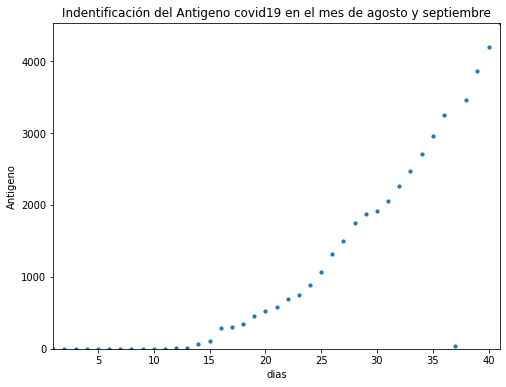

In [ ]:

plot_models(x, y, None, None)

Parámetros del modelo fp1: [  98.00243902 -930.95365854]
Error del modelo fp1: [18234903.57560976]
Parámetros del modelo fp2: [  3.46712646 -47.61687246 112.65140713]
Error del modelo fp2: [10520665.07549444]


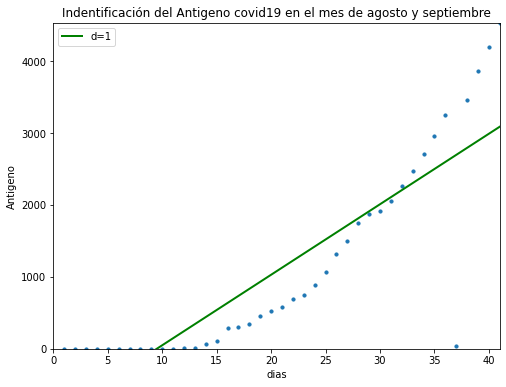

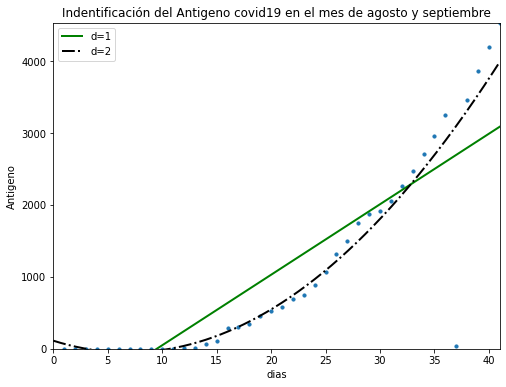

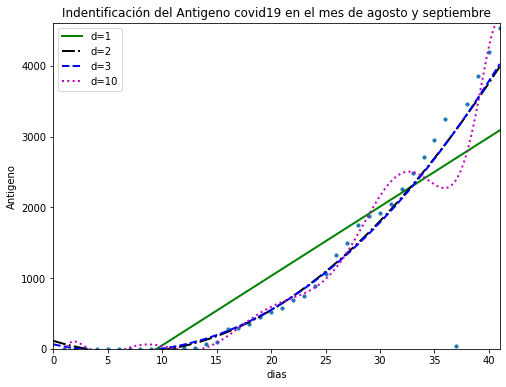

In [ ]:
# Crea y dibuja los modelos de datos
# -----------------------------------------------------------------
fp1, res1, rank1, sv1, rcond1 = np.polyfit(x, y, 1, full=True)
print("Parámetros del modelo fp1: %s" % fp1)
print("Error del modelo fp1:", res1)
f1 = sp.poly1d(fp1)
fp2, res2, rank2, sv2, rcond2 = np.polyfit(x, y, 2, full=True)
print("Parámetros del modelo fp2: %s" % fp2)
print("Error del modelo fp2:", res2)
f2 = sp.poly1d(fp2)
f3 = sp.poly1d(np.polyfit(x, y, 3))
f10 = sp.poly1d(np.polyfit(x, y, 10))
#f100 = sp.poly1d(np.polyfit(x, y, 100))
# Se grafican los modelos
# -----------------------------------------------------------------
plot_models(x, y, [f1], None)
plot_models(x, y, [f1, f2], None)
plot_models(x, y, [f1, f2, f3, f10], None)
# Ajusta y dibuja un modelo utilizando el conocimiento del punto
# de inflexión

In [ ]:
#Función de error 
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

In [ ]:
# Se imprimen los errores
# -----------------------------------------------------------------
print("Errores para el conjunto completo de datos:")
for f in [f1, f2, f3, f10]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))


Errores para el conjunto completo de datos:
Error d=1: 18234903.575610
Error d=2: 10520665.075494
Error d=3: 10509902.010300
Error d=10: 7954412.997227


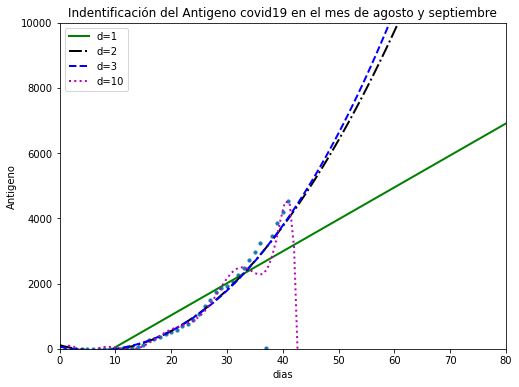

In [ ]:
plot_models(
    x, y, [f1, f2, f3, f10],
    None,
     mx=np.linspace(0 , 80, 100),
    ymax=10000, xmin=0)

vamor a ver en que día llega los 8000 positivos de antigeno Covid19

In [ ]:
x = np.array(x)
y = np.array(y)
frac = 0.4 #El porcentaje de los datos que vamos a tomar para hacer el muestreo

split_idx = int(frac * len(x)) #Numero de datos de muestreo para entranmiento 

shuffled = sp.random.permutation(list(range(len(x)))) #Hacemos una lista de indices que tenga el tamaño de x y luego hace una permutación aleatoria, haciendo que se desordene

test = sorted(shuffled[:split_idx])

train = sorted(shuffled[split_idx:]) #Tome los indices y tome de los indices desordenados y ordenelos


In [ ]:
fbt1 = sp.poly1d(np.polyfit(x[train], y[train], 1))
fbt2 = sp.poly1d(np.polyfit(x[train], y[train], 2))
fbt3 = sp.poly1d(np.polyfit(x[train], y[train], 3)) # tomamos x que sacamos de train y también sacalos los de b, lo hacemos de grado dos, ajustamos la función matemática y la creamos 
print("fbt3(x)= \n%s" % fbt3)
print("fbt2(x)-100,000= \n%s" % (fbt3-8000))
fbt10 = sp.poly1d(np.polyfit(x[train], y[train], 10))

fbt3(x)= 
          3        2
0.003485 x + 3.84 x - 59.81 x + 180.2
fbt2(x)-100,000= 
          3        2
0.003485 x + 3.84 x - 59.81 x - 7820


In [ ]:
def numberToDate(number):
  number = int(number)
  if number > 30 and number <=61:
    day = str(number - 30)
    month = "09"

  elif number >= 62:
    day = str(number - 61)
    month = "10"

  else:
    day = str(number)
    month = "08"
  return day,month

In [ ]:
from scipy.optimize import fsolve
#print(fbt3)
#print(fbt3 - 8500)
alcanzado_max = fsolve(fbt3 - 21000, x0=30)
dia,mes = numberToDate(alcanzado_max[0])

print("\n21,000 positivos antigenos covid19 se alcanzan en el día : ", dia,"/",mes)



21,000 positivos antigenos covid19 se alcanzan en el día :  17 / 10
